Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines. 

这里，通过一张二维灰度图像，来探索卷积的工作原理。可以从scipy库中获取名为"上升"的图像。这是一张漂亮的内置图片，有很多角度和线条。

In [3]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()


/var/folders/j9/l2zn8prs1l52lwzszmjt4ct00000gn/T/ipykernel_43315/2432942062.py:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  i = misc.ascent()


Next, we can use the pyplot library to draw the image so we know what it looks like.

接下来，可以使用pyplot库来绘制图像，这样我们就能看到它的样子了。

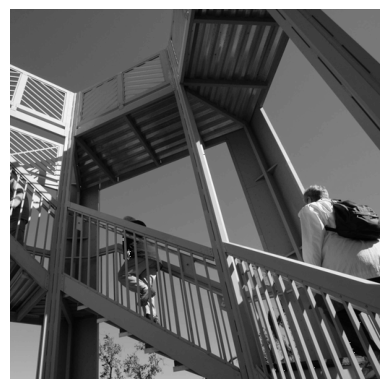

In [4]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later. 

图像是以numpy数组的形式存储的，所以我们只需复制这个数组就可以对图像进行转换。我们还可以得到图像的尺寸，这样就可以用循环遍历它的数据。

In [5]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
i_transformed.shape

(512, 512)

Now we can create a filter as a 3x3 array. 

接下来创建一个3x3的过滤器

In [15]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.
# 这个过滤器可以很好地检测到边缘。
# 它通过卷积运算，只让尖锐的边缘和直线通过。

#Experiment with different values for fun effects.
#试试看修改过滤器的数值，玩玩看
# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
# 另外的几个过滤器，纯粹为了好玩！
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
# 如果过滤器中的所有数字加起来不是0或1，那么就应该设置权重，让过滤器的总和为0或1。
# 例如，如果过滤器是1，1，1，1，2，1，1，1，1。
# 它们加起来是10，所以可以设置0.1的权重，使它标准化。
weight  = 1

Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image. 

接下来让我们创建一个卷积，扫描整个图像，留出1个像素的边框，并将当前像素的每个邻居乘以过滤器中定义的值。

即当前像素上方和左侧的邻域将乘以滤镜中左上方的项，等等。然后我们再将结果乘以权重，然后确保结果在0-255的范围内。

最后我们将把新的值加载到转换后的图像中。

In [17]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

Now we can plot the image to see the effect of the convolution!

现在，我们可以绘制图像，看看卷积的效果!

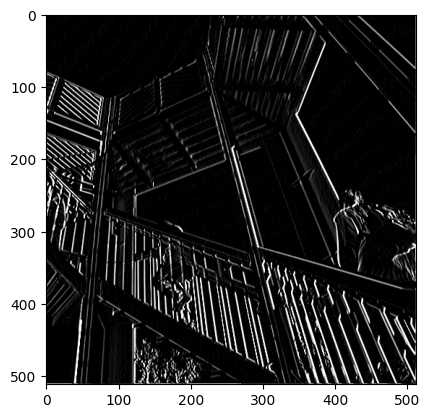

In [18]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

这段代码将显示一个（2，2）池化后的效果。它的想法是用2x2尺寸的矩阵在图像上扫描，查看像素和它的右方、下方和右下方的近邻像素。取其中最大的一个，并将其加载到新图像中。这样，新的图像将是旧图像的1/4大小--通过这个过程，X和Y上的尺寸减半。你会发现，尽管进行了这样的压缩，图像特征还是得到了保留。

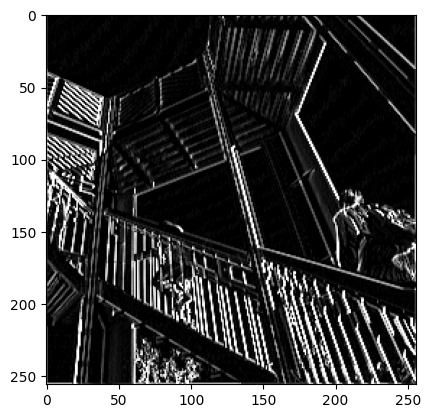

In [19]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      
    
    